In [1]:
from functools import partial

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

Parameters are taken from https://github.com/BDI-pathogens/OpenABM-Covid19/blob/master/documentation/parameters/parameter_dictionary.md

Mean length until death is given as 11.74 days with a standard deviation of 8.79 from a personal communication with researchers.

The normal distribution with this specification has nearly 10% of its probability mass below zero.

In [2]:
mean = 11.74
std = 8.79
var = 8.79 ** 2

print(mean, std)

11.74 8.79


/home/klara/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.99

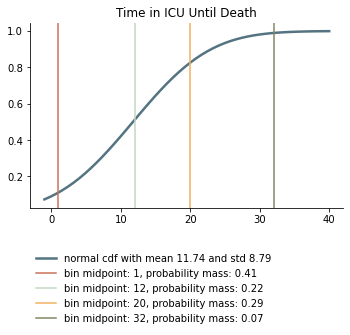

In [3]:
xs = np.linspace(-1, 40)
# cdf_func = partial(norm.cdf, loc=mean, scale=std)
cdf_func = partial(norm.cdf, loc=mean, scale=std)
cdf_ys = cdf_func(x=xs)


def midpoint_with_p_mass(upper, lower=None, color="blue"):
    old_cdf = 0 if lower is None else cdf_func(lower)
    # do not move because cdf_func(5) could be > 0!
    lower = 0 if lower is None else lower
    prob_mass = round(cdf_func(upper) - old_cdf, 2)
    midpoint = round(0.5 * (upper + lower))
    label = f"bin midpoint: {midpoint}, probability mass: {prob_mass}"
    plt.axvline(midpoint, label=label, color=color)
    return prob_mass


fig, ax = plt.subplots(figsize=(5, 5))
sns.lineplot(
    xs,
    cdf_ys,
    label=f"normal cdf with mean {mean} and std {std}",
    color="#547482",
    linewidth=2.5,
)
p1 = midpoint_with_p_mass(10, -8.5, color="#C87259")
p2 = midpoint_with_p_mass(15, 10, color="#C2D8C2")
p3 = midpoint_with_p_mass(25, 15, color="#F1B05D")
p4 = midpoint_with_p_mass(40, 25, color="#818662")
lgd = plt.legend(frameon=False, bbox_to_anchor=(0.8, -0.2))
plt.title("Time in ICU Until Death")
sns.despine()
plt.tight_layout()
plt.savefig("time_until_death.png", bbox_inches="tight", bbox_extra_artists=(lgd,))

p1 + p2 + p3 + p4

In [4]:
pct_die = 0.12
pct_survive = 1 - pct_die
survive_shares = pct_survive * np.array([p1, p2, p3, p4])
print(survive_shares.round(2), pct_die + survive_shares.sum())

[0.36 0.19 0.26 0.06] 0.9912
